In [1]:
from pfio import pfread
import numpy as np
from glob import glob
import os
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import time

start_time = time.time()

In [2]:
def get_file_list(file_pattern, input_file_path='.'):
    # generate the list of input files
    input_files = sorted(glob(os.path.join(input_file_path, file_pattern)))
    return input_files

In [3]:
forcings_folder = '/scratch/arezaii/snake_river_shape_domain/NLDAS'
pattern = 'NLDAS.APCP.*.pfb'

In [4]:
forcing_files = get_file_list(pattern, forcings_folder )

In [5]:
%time days = np.concatenate([pfread(forcing_file) for forcing_file in forcing_files])

CPU times: user 2min 41s, sys: 53.7 s, total: 3min 35s
Wall time: 3min 56s


In [6]:
num_days = len(forcing_files)
num_x = days.shape[2]
num_y = days.shape[1]

In [7]:
x_coords = range(0,num_x)
y_coords = range(0,num_y)
time_coords = pd.date_range('2014-10-01', periods=(num_days*24), freq='H')

In [8]:
%time data = xr.DataArray(days, dims=('time','y','x',), coords={'x':x_coords, 'y':y_coords,'time': time_coords })
data.attrs['long_name'] = 'precipitation'
data.attrs['units'] = 'mm/hr'

CPU times: user 1.18 ms, sys: 59 µs, total: 1.24 ms
Wall time: 1.24 ms


In [9]:
data

<xarray.DataArray (time: 8760, y: 736, x: 704)>
array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 6.43647846e-06, 3.85278946e-04],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 5.77905236e-05, 3.99431230e-04],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 9.71591966e-05, 4.02145312e-04]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.87576029e-03, 2.52288070e-03, 2.15168796e-03],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.44590727e-03, 2.14383332e-03, 1.82289309e-03],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.03436370e-03, 1.78279507e-03, 1.51263951e-03],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         5.61391097e-02, 6.31459651e-02, 7.05587389e-02],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         5.11891790e-02, 5.76281657e-02, 6.44115015e-02],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         4.60533278e-02, 5.19028179e-02, 5.80729582e-02]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.58019758e-01, 1.44883683e-01, 1.31740300e-01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.62143306e-01, 1.49079025e-01, 1.35990170e-01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.66289740e-01, 1.53288591e-01, 1.40271505e-01],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         5.14443772e-02, 5.72792139e-02, 6.31684793e-02],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         5.09440712e-02, 5.66955780e-02, 6.27602785e-02],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         5.03964979e-02, 5.61632350e-02, 6.24144689e-02]],

       ...,

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00,

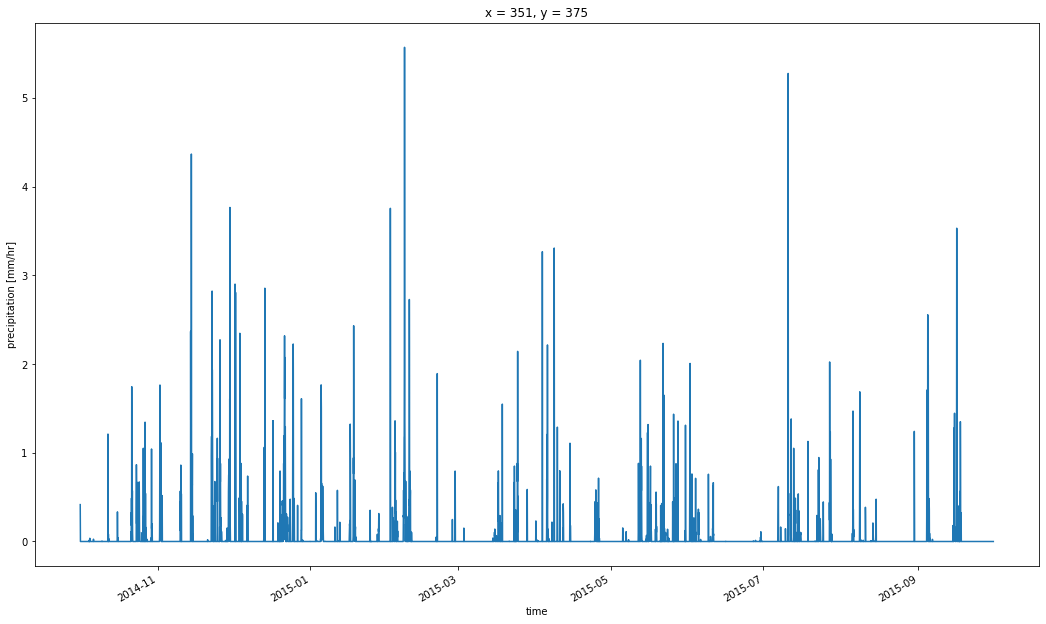

In [10]:
data[:,375,351].plot(figsize=(18,10))

In [11]:
%time data[:,375,351].mean(dim='time')

CPU times: user 1.17 ms, sys: 750 µs, total: 1.92 ms
Wall time: 1.34 ms


<xarray.DataArray ()>
array(0.05067908)
Coordinates:
    x        int64 351
    y        int64 375

In [12]:
%time day_avg = data[:,375,351].groupby("time.dayofyear").mean(dim='time', keep_attrs=True)

CPU times: user 105 ms, sys: 10.7 ms, total: 115 ms
Wall time: 115 ms


In [13]:
day_avg

<xarray.DataArray (dayofyear: 365)>
array([4.10051245e-05, 1.93782693e-06, 3.51450993e-02, 2.06856244e-05,
       4.90471855e-01, 3.21239336e-02, 4.96570381e-05, 0.00000000e+00,
       2.83804002e-05, 6.80486980e-03, 2.40249402e-02, 1.68750688e-02,
       0.00000000e+00, 0.00000000e+00, 1.66099451e-06, 1.57632182e-01,
       4.75687385e-02, 4.84065773e-01, 9.12673476e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.50092399e-02,
       1.71743670e-04, 0.00000000e+00, 3.38522622e-03, 3.42857258e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.56432882e-01,
       4.38976099e-02, 2.01419447e-01, 8.30557440e-02, 0.00000000e+00,
       0.00000000e+00, 1.12224200e+00, 1.16611354e-01, 4.43341871e-01,
       3.61155255e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.49919301e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.88942168e-02, 6.58975711e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.28646463e-03, 0.00000000e+00, 1.10732968e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.24533389e-03, 2.29481107e-02, 6.30086064e-03, 1.21130156e-01,
       8.23872688e-02, 0.00000000e+00, 0.00000000e+00, 1.61218413e-04,
       0.00000000e+00, 1.02104647e-01, 2.91556926e-01, 2.76832419e-07,
       5.53664838e-07, 0.00000000e+00, 3.85758095e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.05425294e-02, 0.00000000e+00,
       1.36062045e-01, 0.00000000e+00, 2.63148017e-01, 7.06662662e-03,
       9.11004271e-03, 1.37775346e-01, 6.35021642e-02, 6.64330358e-02,
       6.35043538e-03, 4.69775370e-02, 0.00000000e+00, 1.41028960e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.53664838e-07,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.05384832e-05,
       4.71826742e-05, 1.00206940e-01, 6.33636059e-02, 1.03477284e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.00411715e-03, 0.00000000e+00, 1.01882739e-02, 8.69933370e-04,
       1.25463402e-05, 0.00000000e+00, 0.00000000e+00, 1.73190652e-01,
       2.07862861e-01, 0.00000000e+00, 2.36063820e-01, 2.30514648e-01,
       4.68721652e-02, 1.01315775e-02, 8.39224600e-02, 4.33912667e-04,
       1.70315290e-01, 1.51869721e-01, 5.75579298e-03, 2.98108446e-03,
       2.82118982e-02, 9.84911196e-02, 1.84158021e-01, 1.68706945e-07,
       0.00000000e+00, 6.99318260e-02, 0.00000000e+00, 2.53990635e-01,
       8.68876999e-02, 5.51563152e-02, 1.41309283e-02, 3.55768758e-02,
       0.00000000e+00, 0.00000000e+00, 1.10732968e-06, 3.73006327e-02,
       9.35994098e-02, 3.72241049e-02, 0.00000000e+00, 0.00000000e+00,
       2.21465935e-06, 0.00000000e+00, 1.07261420e-04, 0.00000000e+00,
       0.00000000e+00, 2.21465935e-06, 3.53678224e-05, 2.75881539e-05,
       1.10732968e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.32488412e-04, 0.00000000e+00, 2.53270168e-03,
       8.34358832e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.04952084e-02, 5.06769896e-02,
       0.00000000e+00, 1.43486611e-02, 2.82042290e-01, 5.80012326e-02,
       1.14747601e-01, 1.09642480e-01, 1.87051750e-02, 7.78856507e-02,
       2.82176647e-03, 0.00000000e+00, 5.47169683e-02, 0.00000000e+00,
       0.00000000e+00, 2.80863037e-04, 1.22197911e-02, 2.05318596e-01,
       3.25753739e-03, 1.85731837e-02, 0.00000000e+00, 3.03404895e-01,
       1.48046423e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.36461099e-01, 3.14868729e-02, 0.00000000e+00, 2.47814239e-01,
       8.11408222e-04, 2.88144135e-02, 0.00000000e+00, 7.11

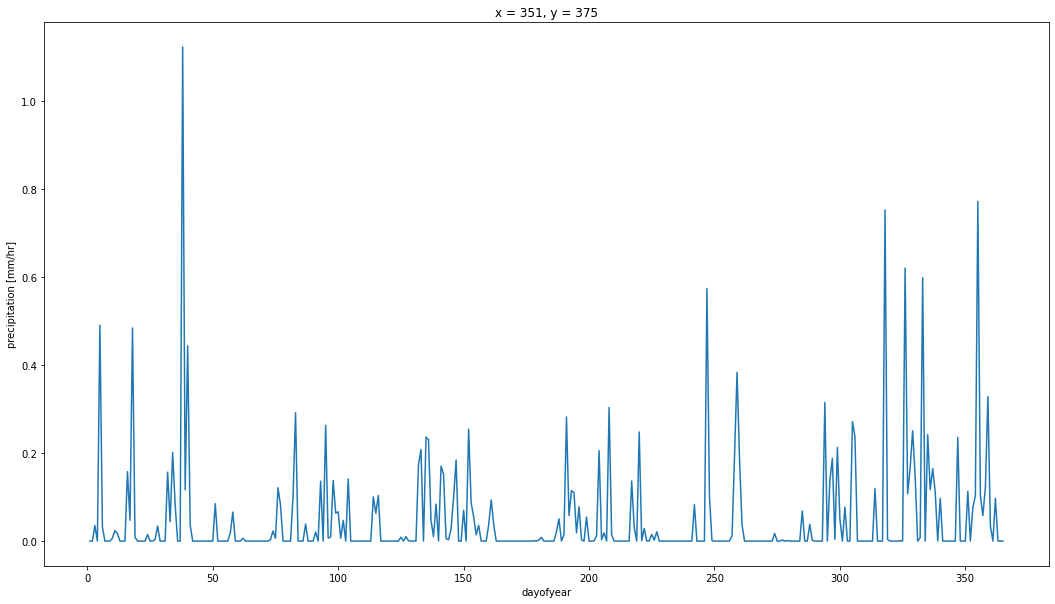

In [14]:
day_avg.plot(figsize=(18,10))

In [15]:
end_time = time.time()
end_time - start_time

237.18471217155457